In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Visiulazation
import matplotlib.pyplot as plt
#image processing
import cv2
#extracting zippped file
import tarfile
# from cv2 import *
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

In [3]:
URL = "IMAGE_FOR_FACE_DETECTION/"

In [5]:
# using openCV DNN to build bounding box on each face

modelFile = "CAFFEE/res10_300x300_ssd_iter_140000.caffemodel"
configFile = "CAFFEE/deploy.prototxt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

In [6]:
# Load model
model = load_model('MODEL/model.05-0.00.h5')

In [7]:
def get_photos(URL):
    national_team_org=cv2.imread(URL)
    return np.copy(national_team_org)

In [10]:
def predict_class(img_name, model):
    """
    Function to predict new image
    """
    result = model.predict(img_name)
    list_predict=result[0]
    list_predict = list_predict.tolist()
    return list_predict

In [8]:
def show_image(image):
    plt.figure(figsize=(18,15))
    #Before showing image, bgr color order transformed to rgb order
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [12]:
#gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
# multiple faces needs increasing the size of image as well as multiple detections
def nfaces_dnn(img):
    blob = cv2.dnn.blobFromImage(img, 1.01, (300,300), [104, 117, 123], False, False) #
    # params: source, scale=1, size=300,300, mean RGB values (r,g,b), rgb swapping=false, crop = false
    conf_threshold=0.25 # confidence at least 60%
    frameWidth=img.shape[1] # get image width
    frameHeight=img.shape[0] # get image height
    net.setInput(blob)
    detections = net.forward()
  
    bboxes = []
    
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            box = detections[0, 0, i, 3:7] * np.array(
                [frameWidth, frameHeight, frameWidth, frameHeight])
            (startX, startY, endX, endY) = box.astype("int")

            # ensure the bounding boxes fall within the dimensions of
            # the frame
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (
                min(frameWidth - 1, endX), 
                min(frameHeight - 1, endY))

            face = img[startY:endY, startX:endX]
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = cv2.resize(face, (224, 224))
            face = img_to_array(face)
            face = preprocess_input(face)
            face = np.expand_dims(face, axis=0)

            # pass the face through the model to determine if the face
            # has a mask or not
            (mask, withoutMask) = predict_class(face, model)

            # determine the class label and color we'll use to draw
            # the bounding box and text
            label = "Mask" if mask > withoutMask else "No Mask"
            color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

            # include the probability in the label
            label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

            # display the label and bounding box rectangle on the output
            # frame
            cv2.putText(img, label, (startX, startY - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
            cv2.rectangle(img, (startX, startY), (endX, endY), color, 2)

    show_image(img)


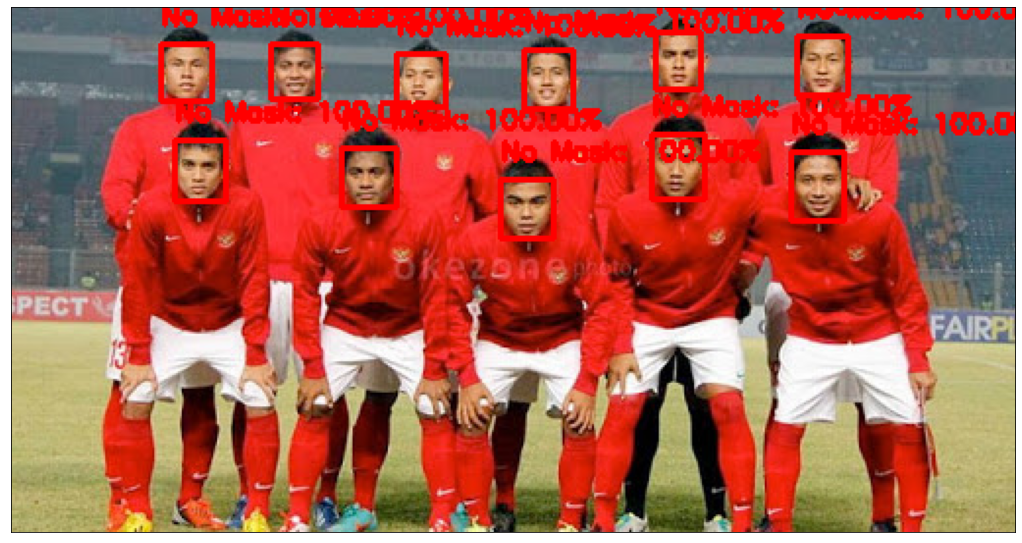

In [13]:
img=get_photos(URL+"timnas.jpg")
c=nfaces_dnn(img)

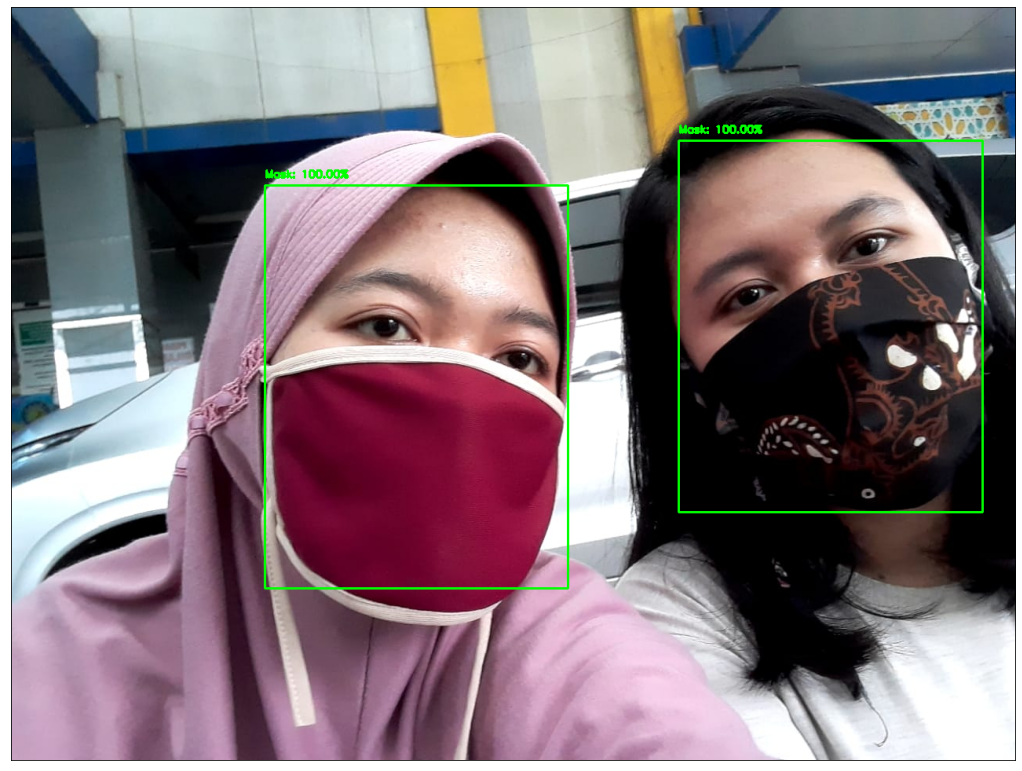

In [14]:
image=cv2.imread(URL+"testCase2.jpeg")
c=nfaces_dnn(image)

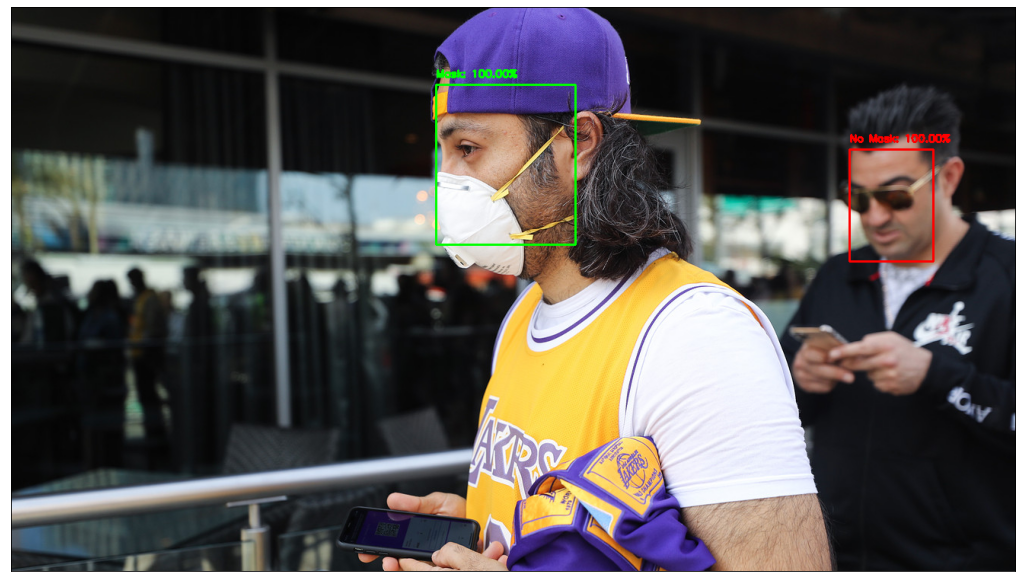

In [15]:
image=cv2.imread(URL+"testCase4.jpg")
c=nfaces_dnn(image)

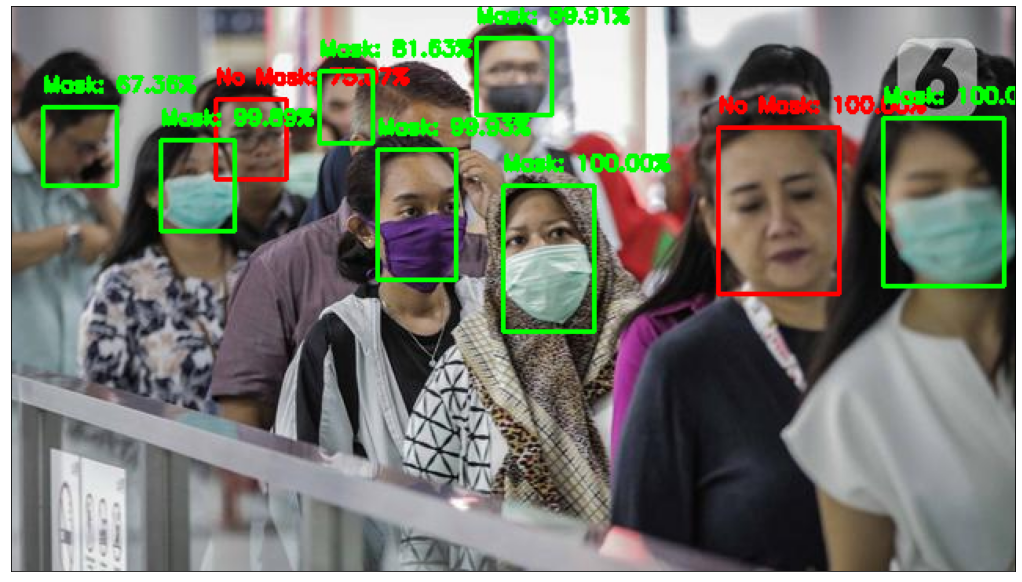

In [16]:
image=cv2.imread(URL+"testCase5.jpg")
c=nfaces_dnn(image)

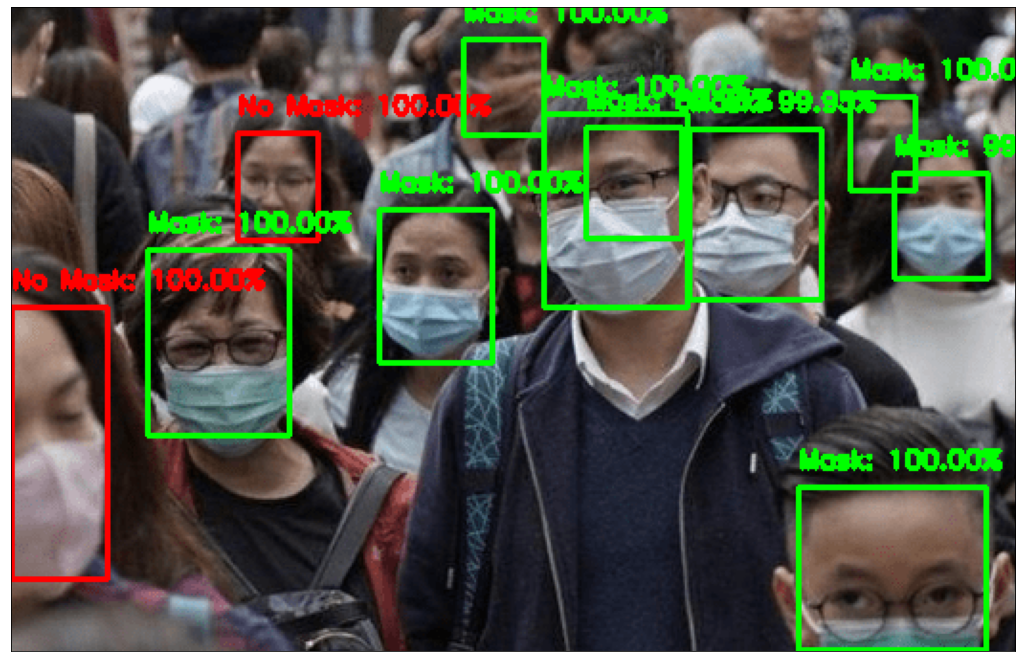

In [17]:
image=cv2.imread(URL+"testCase6.png")
c=nfaces_dnn(image)

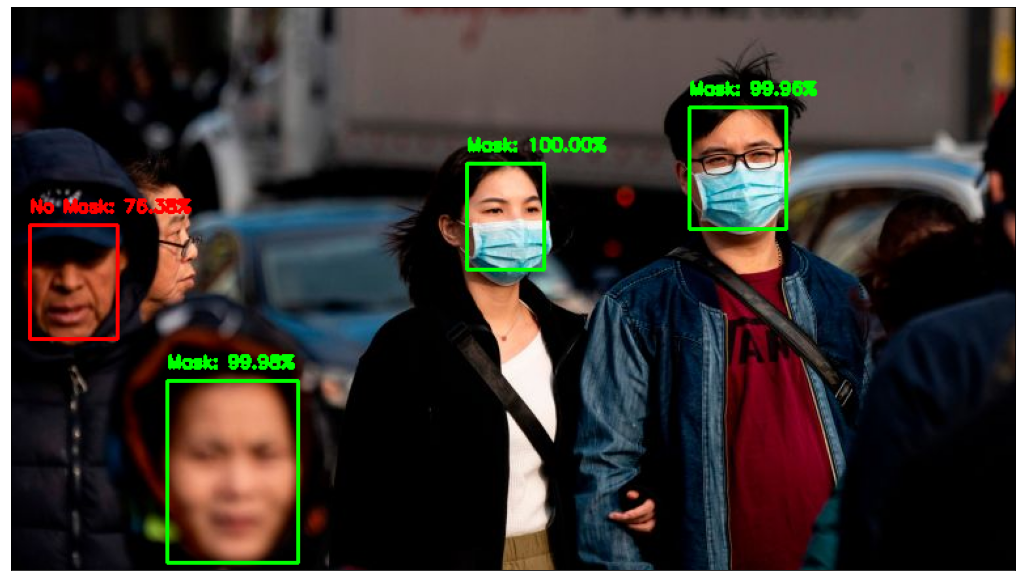

In [18]:
image=cv2.imread(URL+"testCase7.jpg")
c=nfaces_dnn(image)

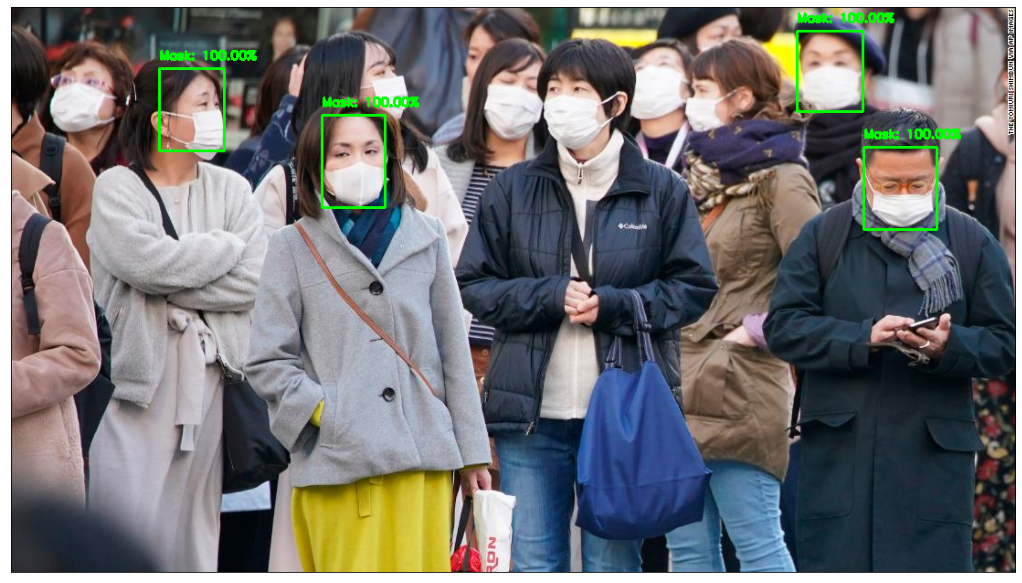

In [19]:
image=cv2.imread(URL+"testCase8.jpg")
c=nfaces_dnn(image)

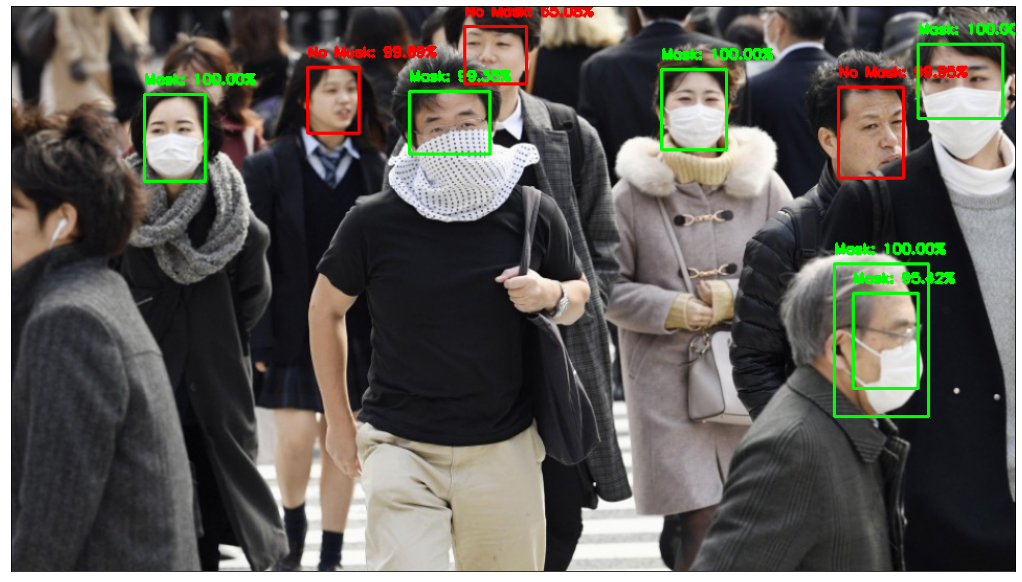

In [20]:
image=cv2.imread(URL+"testCase9.png")
c=nfaces_dnn(image)